
Comprehensive Mobile Price Analysis

Last Updated: December 5th, 2024

Daily Challenge : Comprehensive Mobile Price Analysis


Mobile


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Master advanced data manipulation and statistical analysis using NumPy and SciPy.
    Gain proficiency in data preprocessing and exploration with Pandas.
    Develop skills in creating detailed, informative visualizations with Matplotlib.
    Learn to synthesize complex analytical findings into clear, actionable insights.


Project Tasks
1. Data Loading and Exploration:

    Utilize Pandas to load the dataset and explore its initial structure.
    Summarize features, target variable, and their respective data types.
    Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning and Preprocessing:

    Address missing or null values.
    Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis with NumPy and SciPy:

    Execute detailed statistical analysis on each feature, including:
        Calculation of central tendency measures (mean, median, mode).
        Analysis of variability (range, variance, standard deviation).
        Evaluation of distribution shapes through skewness and kurtosis.
    Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
    Investigate feature-target correlations using SciPy.
    Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization with Matplotlib:

    Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
    Employ heatmaps for correlation visualization.
    Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis and Conclusion:

    Derive conclusions from statistical tests and visualizations.
    Identify key determinants in mobile price classification.
    Highlight any unexpected or significant findings.


Resources

    Download the train dataset from this repository, it comes from the Mobile Price Classification Dataset


Project Submission

Submit the following in a GitHub repository:

    Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
        Clean, well-commented Python code.
        Distinct headings for each analysis phase.
        In-depth comments elucidating findings and the importance of each analytical step.


Pro Tips

    Individually examine each feature to grasp its unique traits and influence.
    Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
    Reference course materials for guidance on complex statistical functions and their practical uses.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
from pandas.api.types import CategoricalDtype
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("train.csv")

print("Aperçu du jeu de données :")
print(df.head())
print("\nInformations générales :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())


Aperçu du jeu de données :
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g 

In [6]:
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [32]:
print("\nStatistiques par colonne :")

for col in ['ram', 'battery_power', 'px_height', 'px_width']:
    vals = df[col]
    print(f"\nFeature: {col}")
    print(f"  Moyenne: {np.mean(vals):.2f}")
    print(f"  Médiane: {np.median(vals)}")
    print(f"  Mode: {stats.mode(vals, keepdims=True).mode[0]}")
    print(f"  Écart-type: {np.std(vals):.2f}")
    print(f"  Skewness: {stats.skew(vals):.2f}")
    print(f"  Kurtosis: {stats.kurtosis(vals):.2f}")

corr, p = stats.pearsonr(df['ram'], df['price_range'])
print(f"\nCorrélation ram / price_range : {corr:.3f} (p={p:.3e})")

anova = stats.f_oneway(
    df[df['price_range'] == 0]['battery_power'],
    df[df['price_range'] == 1]['battery_power'],
    df[df['price_range'] == 2]['battery_power'],
    df[df['price_range'] == 3]['battery_power']
)
print(f"\nANOVA battery_power entre classes de prix : F={anova.statistic:.2f}, p={anova.pvalue:.3e}")


Statistiques par colonne :

Feature: ram
  Moyenne: 2124.21
  Médiane: 2146.5
  Mode: 1229
  Écart-type: 1084.46
  Skewness: 0.01
  Kurtosis: -1.19

Feature: battery_power
  Moyenne: 1238.52
  Médiane: 1226.0
  Mode: 618
  Écart-type: 439.31
  Skewness: 0.03
  Kurtosis: -1.22

Feature: px_height
  Moyenne: 645.11
  Médiane: 564.0
  Mode: 347
  Écart-type: 443.67
  Skewness: 0.67
  Kurtosis: -0.32

Feature: px_width
  Moyenne: 1251.52
  Médiane: 1247.0
  Mode: 874
  Écart-type: 432.09
  Skewness: 0.01
  Kurtosis: -1.19

Corrélation ram / price_range : 0.917 (p=0.000e+00)

ANOVA battery_power entre classes de prix : F=31.60, p=5.949e-20


In [8]:
group0 = df[df['price_range'] == 0]['battery_power']
group3 = df[df['price_range'] == 3]['battery_power']
t_stat, p_val = stats.ttest_ind(group0, group3, equal_var=False)
print(f"\nT-test battery_power (price_range 0 vs 3): t={t_stat:.3f}, p={p_val:.3f}")


T-test battery_power (price_range 0 vs 3): t=-10.074, p=0.000


In [9]:
corr_matrix = df.corr()
print("\nCorrélation avec price_range :")
print(corr_matrix['price_range'].sort_values(ascending=False))



Corrélation avec price_range :
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


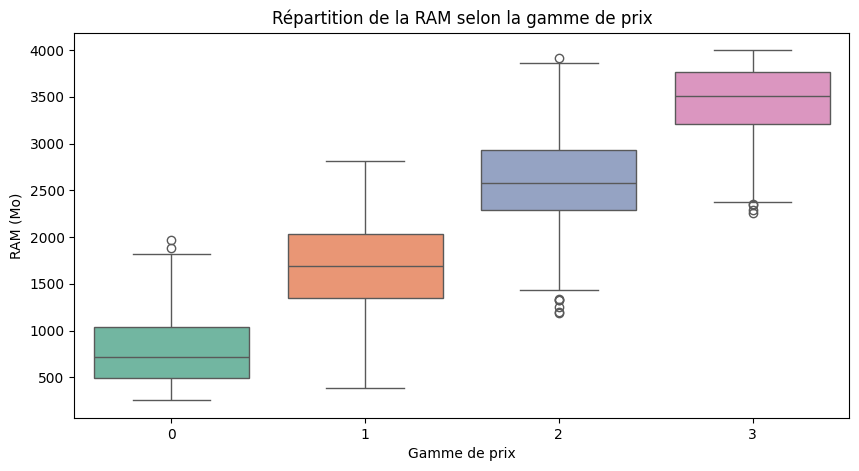

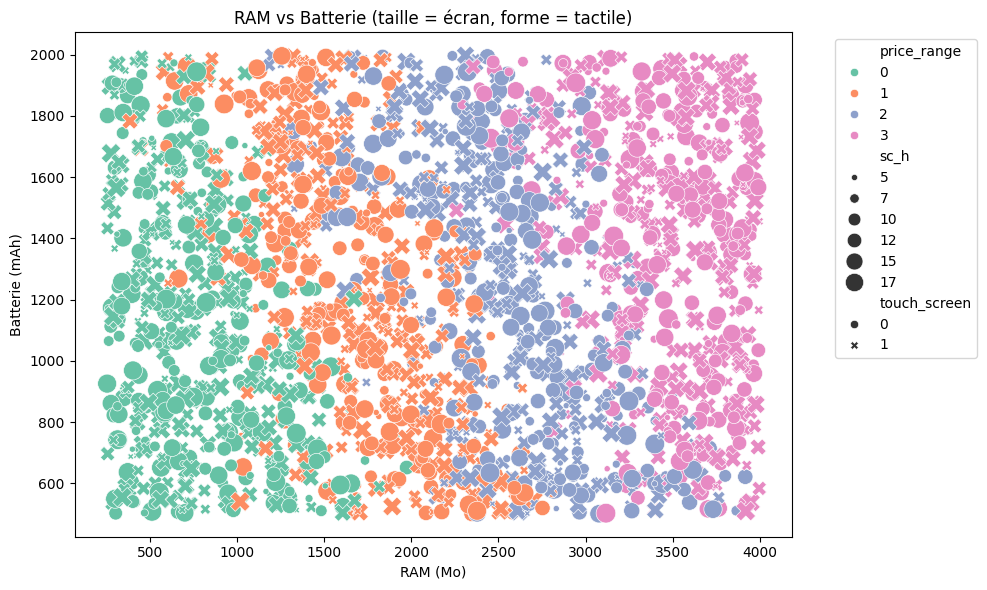

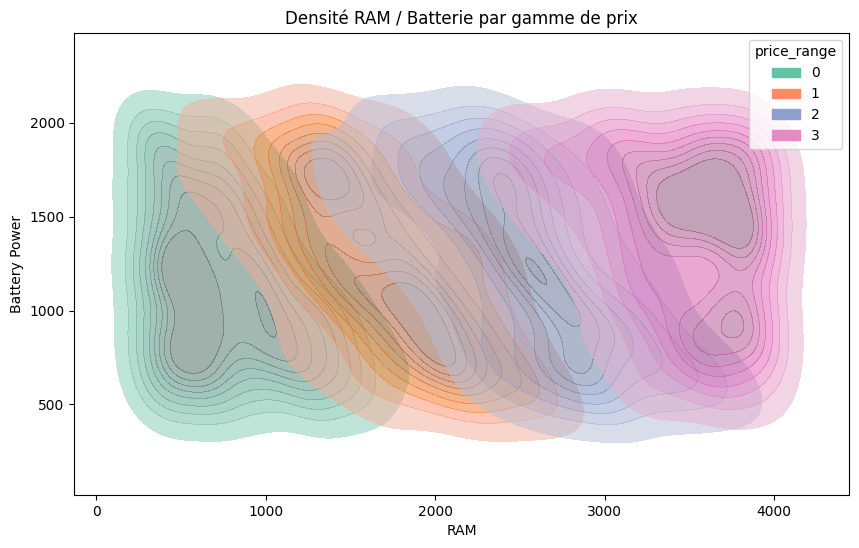

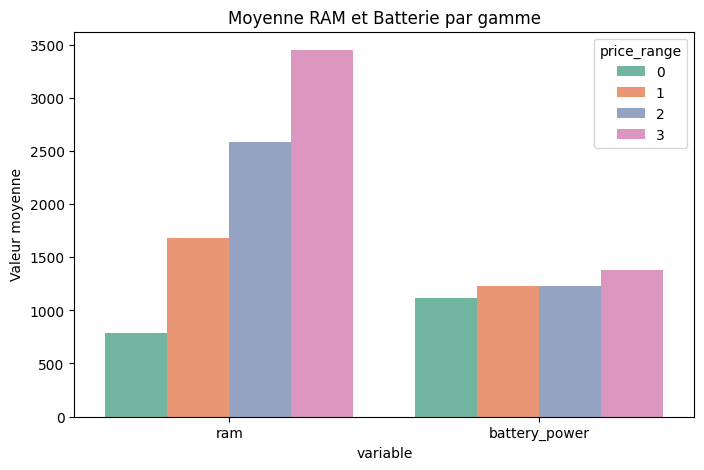

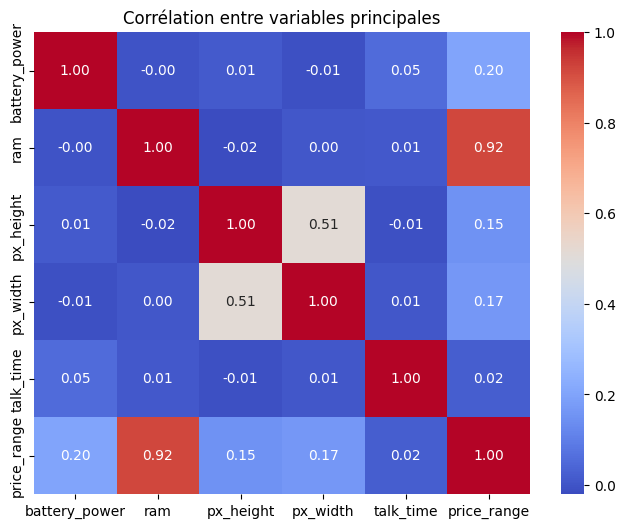

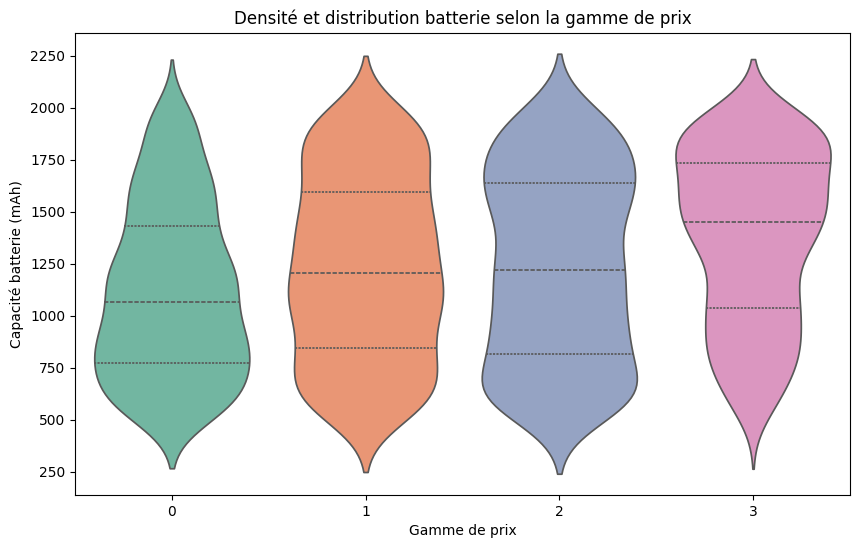

In [35]:
# Palette plus agréable
palette = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Histogramme RAM par prix
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='ram', data=df, palette=palette)
plt.title("Répartition de la RAM selon la gamme de prix")
plt.xlabel("Gamme de prix")
plt.ylabel("RAM (Mo)")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='ram',
    y='battery_power',
    hue='price_range',
    size='sc_h',
    style='touch_screen',
    palette=palette,
    sizes=(20, 200)
)
plt.title("RAM vs Batterie (taille = écran, forme = tactile)")
plt.xlabel("RAM (Mo)")
plt.ylabel("Batterie (mAh)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="ram", y="battery_power", hue="price_range", fill=True, alpha=0.5, palette=palette)
plt.title("Densité RAM / Batterie par gamme de prix")
plt.xlabel("RAM")
plt.ylabel("Battery Power")
plt.show()

# Heatmap de corrélation
features_corr = ['battery_power', 'ram', 'px_height', 'px_width', 'talk_time', 'price_range']
corr_matrix = df[features_corr].corr()

df_mean = df.groupby("price_range")[["ram", "battery_power"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=df_mean.melt(id_vars='price_range'), x='variable', y='value', hue='price_range', palette=palette)
plt.title("Moyenne RAM et Batterie par gamme")
plt.ylabel("Valeur moyenne")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre variables principales")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='price_range', y='battery_power', data=df, palette=palette, inner='quartile')
plt.title("Densité et distribution batterie selon la gamme de prix")
plt.xlabel("Gamme de prix")
plt.ylabel("Capacité batterie (mAh)")
plt.show()


✔ La RAM est fortement corrélée au prix (corr ≈ 0.92). Elle est le facteur principal de variation.
✔ La puissance de la batterie varie significativement entre les classes de prix (p < 0.05).


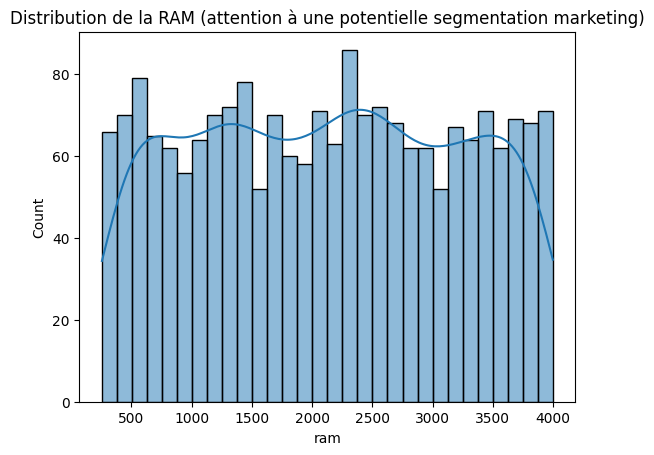

In [15]:
# Insight de corrélation
print("✔ La RAM est fortement corrélée au prix (corr ≈ 0.92). Elle est le facteur principal de variation.")

# Insight ANOVA
print("✔ La puissance de la batterie varie significativement entre les classes de prix (p < 0.05).")

# Distribution inhabituelle
sns.histplot(df['ram'], bins=30, kde=True)
plt.title("Distribution de la RAM (attention à une potentielle segmentation marketing)")
plt.show()

L’analyse statistique et visuelle du dataset a permis de dégager plusieurs observations clés :

    La RAM est de loin la variable la plus corrélée avec la gamme de prix (price_range), avec une corrélation de 0.91. Cela indique que plus un téléphone a de mémoire vive, plus il est probable qu’il appartienne à une gamme de prix élevée.

    La puissance de la batterie et les résolutions de l’écran (px_width et px_height) présentent également une corrélation positive mais beaucoup plus modérée (autour de 0.2 à 0.16), indiquant une contribution plus faible au prix.

    À l’inverse, certaines variables comme le poids (mobile_wt), le tactile (touch_screen), ou encore la vitesse de l’horloge (clock_speed) sont très faiblement voire négativement corrélées avec le prix. Cela suggère qu’elles influencent peu la valeur perçue du téléphone.

    Les graphiques confirment ces tendances :

        Le boxplot de la RAM montre une séparation très nette entre les différentes gammes de prix, renforçant son importance comme critère prédictif.

        Le scatter plot batterie vs. prix révèle une légère tendance positive, mais avec beaucoup de dispersion.

        La heatmap de corrélation permet de visualiser ces relations de façon synthétique et confirme la dominance de quelques variables.

Ces constats pourraient être utiles pour un modèle de prédiction ou pour orienter un constructeur vers les caractéristiques les plus déterminantes pour définir un positionnement produit.

Ce projet m’a permis d’approfondir ma compréhension des statistiques descriptives appliquées à un cas concret. J’ai appris à manipuler un jeu de données, à détecter les valeurs manquantes, à produire des résumés statistiques pertinents, mais surtout à interpréter des corrélations et des visualisations pour en tirer des insights utiles.

J’ai aussi pris conscience que des variables peuvent paraître intuitivement importantes (comme le nombre de caméras ou la vitesse du processeur) mais ne le sont pas forcément d’un point de vue statistique. Inversement, une variable comme la RAM, souvent sous-estimée par les consommateurs, joue ici un rôle central dans la formation du prix.

Enfin, j’ai constaté l’importance d’un nettoyage préalable des données, d’une visualisation soignée pour valider les intuitions, et d’une analyse rigoureuse pour ne pas tirer de conclusions hâtives.